In [15]:
import h5py
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

no_cfgs = 77
#lattice size a
a = 0.114


# plateau_fit
def plateau_fit(x, y):
    return y*(x/x)

def W(r,t): #Wilson loop W for given r and t
    list_r_t_avg_wilsonloop_all_cfgs = [] #for given r and t
    for cfgs in range(1776, 2081, 4):
        file_path = f"/global/homes/h/hari_8/QLUA_tutorials/wilson_loops_from_configs/wilson_loops_function_cfg_{cfgs}_upto_20x20_creutz_ratio.h5"
        with h5py.File(file_path, "r") as h5_file:
            avg_wilsonloop_list_plane = []
            for i_axis in range(0,3):
                path_to_WilsonLoops = f"/Wilson_loops/wilson_{r}_x_{t}/i_{i_axis}_j_3"
                wilsonloop = h5_file[path_to_WilsonLoops]
                avg_wilsonloop_list_plane.append(wilsonloop[()])
            list_r_t_avg_wilsonloop_all_cfgs.append(np.mean(avg_wilsonloop_list_plane)) 
    return list_r_t_avg_wilsonloop_all_cfgs

def Creutz_ratio(r, t):
    list_Creutz_ratio = []
    for cfgs in range(no_cfgs):
        chi_r_t = - np.log(( (W(r,t)[cfgs])*(W(r-1,t-1)[cfgs]) )/( (W(r,t-1)[cfgs])*(W(r-1,t)[cfgs]) ))
        list_Creutz_ratio.append(chi_r_t)
    Creutz_ratio_mean = np.mean(list_Creutz_ratio)
    Creutz_ratio_error = np.std(list_Creutz_ratio)/np.sqrt(no_cfgs-1)
    #jackknife sets
    sigma_square_jackknife = 0 
    for i in range(no_cfgs):
        sliced_list_Creutz_ratio = list_Creutz_ratio[:(i)] + list_Creutz_ratio[(i+1):]
        sigma_square_jackknife = sigma_square_jackknife + np.square(np.mean(sliced_list_Creutz_ratio)-Creutz_ratio_mean)
    Creutz_ratio_jackknife_error =  np.sqrt(sigma_square_jackknife*((no_cfgs-1)/no_cfgs)) 
    return Creutz_ratio_mean, Creutz_ratio_jackknife_error

def plot_chi_r_6(plateau_t_i, plateau_t_f, no_of_points):
    chi_r_6 = []
    chi_r_6_err = []
    for t in range(4, 11):
        Creutz_ratio_mean, Creutz_ratio_error = Creutz_ratio(6,t)
        chi_r_6.append(Creutz_ratio_mean)
        chi_r_6_err.append(Creutz_ratio_error)
    time_for_plateau = list(range(plateau_t_i, plateau_t_f + 1))
    params_mexp, cov_mexp = curve_fit(plateau_fit, time_for_plateau, chi_r_6[-no_of_points:], sigma = chi_r_6_err[-no_of_points:], absolute_sigma=True)
    sigma_fit = params_mexp
    sigma_err = np.sqrt(np.diag(cov_mexp))
    tension_2 = np.sqrt((sigma_fit*197*197)/(a*a))
    tension_err = ((sigma_err*197*197)/(a*a))
    tension_2_err = (1/2)*(tension_err/tension_2)
    x_curve = np.linspace(np.min(time_for_plateau), np.max(time_for_plateau), 100)
    y_curve = np.full(100, sigma_fit) 
    plt.subplots(figsize=(16, 7),dpi=300)
    plt.errorbar(range(4, 11), chi_r_6, yerr = chi_r_6_err, fmt='o', markersize=8, capsize=10, color='blue', label= '$\chi(r=6,~t)$ form 77 cfgs')
    plt.plot(x_curve, y_curve, 'r-', label='Plateau fit: $a^2\sigma$')
    plt.xlabel("Temporal separation t", fontsize=12)
    plt.ylabel("Creutz ratio $\chi(r=6,~t)$", fontsize=12)
    plt.suptitle("Creutz ratio: $\chi(r=6,~t)~=~-\ln\\left(\\frac{\\langle W(6,t) \\rangle~\\langle W(5,t-1) \\rangle}{\\langle W(6,t-1)\\rangle~\\langle W(5,t) \\rangle}\\right)~~->~a^2~\sigma~=~(%.4f \u00B1 %.4f)$"%(sigma_fit, sigma_err), fontsize=15)
    plt.title("String tension: $\sigma ~= (%.4f \u00B1 %.4f)^2 MeV^2 $"%(tension_2, tension_2_err), fontsize=15)
    plt.legend(fontsize=15)
    plt.xticks(fontsize=10)
    plt.yticks(fontsize=10)
    plt.tight_layout()
    plt.grid(True)
    plt.show()
    print("                  ")
    return


def plot_chi_t_5(plateau_t_i, plateau_t_f, no_of_points):
    chi_r_6 = []
    chi_r_6_err = []
    for r in range(4, 13):
        Creutz_ratio_mean, Creutz_ratio_error = Creutz_ratio(r,5)
        chi_r_6.append(Creutz_ratio_mean)
        chi_r_6_err.append(Creutz_ratio_error)
    time_for_plateau = list(range(plateau_t_i, plateau_t_f + 1))
    params_mexp, cov_mexp = curve_fit(plateau_fit, time_for_plateau, chi_r_6[-no_of_points:], sigma = chi_r_6_err[-no_of_points:], absolute_sigma=True)
    sigma_fit = params_mexp
    sigma_err = np.sqrt(np.diag(cov_mexp))
    tension_2 = np.sqrt((sigma_fit*197*197)/(a*a))
    tension_err = ((sigma_err*197*197)/(a*a))
    tension_2_err = (1/2)*(tension_err/tension_2)
    x_curve = np.linspace(np.min(time_for_plateau), np.max(time_for_plateau), 100)
    y_curve = np.full(100, sigma_fit) 
    plt.subplots(figsize=(16, 7),dpi=300)
    plt.errorbar(range(4, 13), chi_r_6, yerr = chi_r_6_err, fmt='o', markersize=8, capsize=10, color='blue', label= '$\chi(r,~t=5)$ form 77 cfgs')
    plt.plot(x_curve, y_curve, 'r-', label='Plateau fit: $a^2\sigma$')
    plt.xlabel("Spatial separation r", fontsize=12)
    plt.ylabel("Creutz ratio $\chi(r,~t=5)$", fontsize=12)
    plt.suptitle("Creutz ratio: $\chi(r,~t=5)~=~-\ln\\left(\\frac{\\langle W(r,5) \\rangle~\\langle W(r-1,4) \\rangle}{\\langle W(r,4)\\rangle~\\langle W(r-1,5) \\rangle}\\right)~~->~a^2~\sigma~=~(%.4f \u00B1 %.4f)$"%(sigma_fit, sigma_err), fontsize=15)
    plt.title("String tension: $\sigma ~= (%.4f \u00B1 %.4f)^2 MeV^2 $"%(tension_2, tension_2_err), fontsize=15)
    plt.legend(fontsize=15)
    plt.xticks(fontsize=10)
    plt.yticks(fontsize=10)
    plt.tight_layout()
    plt.grid(True)
    plt.show()
    print("                  ")
    return



def plot_chi_t_6(plateau_t_i, plateau_t_f, no_of_points):
    chi_r_6 = []
    chi_r_6_err = []
    for r in range(4, 11):
        Creutz_ratio_mean, Creutz_ratio_error = Creutz_ratio(r,6)
        chi_r_6.append(Creutz_ratio_mean)
        chi_r_6_err.append(Creutz_ratio_error)
    time_for_plateau = list(range(plateau_t_i, plateau_t_f + 1))
    params_mexp, cov_mexp = curve_fit(plateau_fit, time_for_plateau, chi_r_6[-no_of_points:], sigma = chi_r_6_err[-no_of_points:], absolute_sigma=True)
    sigma_fit = params_mexp
    sigma_err = np.sqrt(np.diag(cov_mexp))
    tension_2 = np.sqrt((sigma_fit*197*197)/(a*a))
    tension_err = ((sigma_err*197*197)/(a*a))
    tension_2_err = (1/2)*(tension_err/tension_2)
    x_curve = np.linspace(np.min(time_for_plateau), np.max(time_for_plateau), 100)
    y_curve = np.full(100, sigma_fit) 
    plt.subplots(figsize=(16, 7),dpi=300)
    plt.errorbar(range(4, 11), chi_r_6, yerr = chi_r_6_err, fmt='o', markersize=8, capsize=10, color='blue', label= '$\chi(r,~t=6)$ form 77 cfgs')
    plt.plot(x_curve, y_curve, 'r-', label='Plateau fit: $a^2\sigma$')
    plt.xlabel("Spatial separation r", fontsize=12)
    plt.ylabel("Creutz ratio $\chi(r,~t=6)$", fontsize=12)
    plt.suptitle("Creutz ratio: $\chi(r,~t=6)~=~-\ln\\left(\\frac{\\langle W(r,6) \\rangle~\\langle W(r-1,5) \\rangle}{\\langle W(r,5)\\rangle~\\langle W(r-1,6) \\rangle}\\right)~~->~a^2~\sigma~=~(%.4f \u00B1 %.4f)$"%(sigma_fit, sigma_err), fontsize=15)
    plt.title("String tension: $\sigma ~= (%.4f \u00B1 %.4f)^2 MeV^2 $"%(tension_2, tension_2_err), fontsize=15)
    plt.legend(fontsize=15)
    plt.xticks(fontsize=10)
    plt.yticks(fontsize=10)
    plt.tight_layout()
    plt.grid(True)
    plt.show()
    print("                  ")
    return
        
        



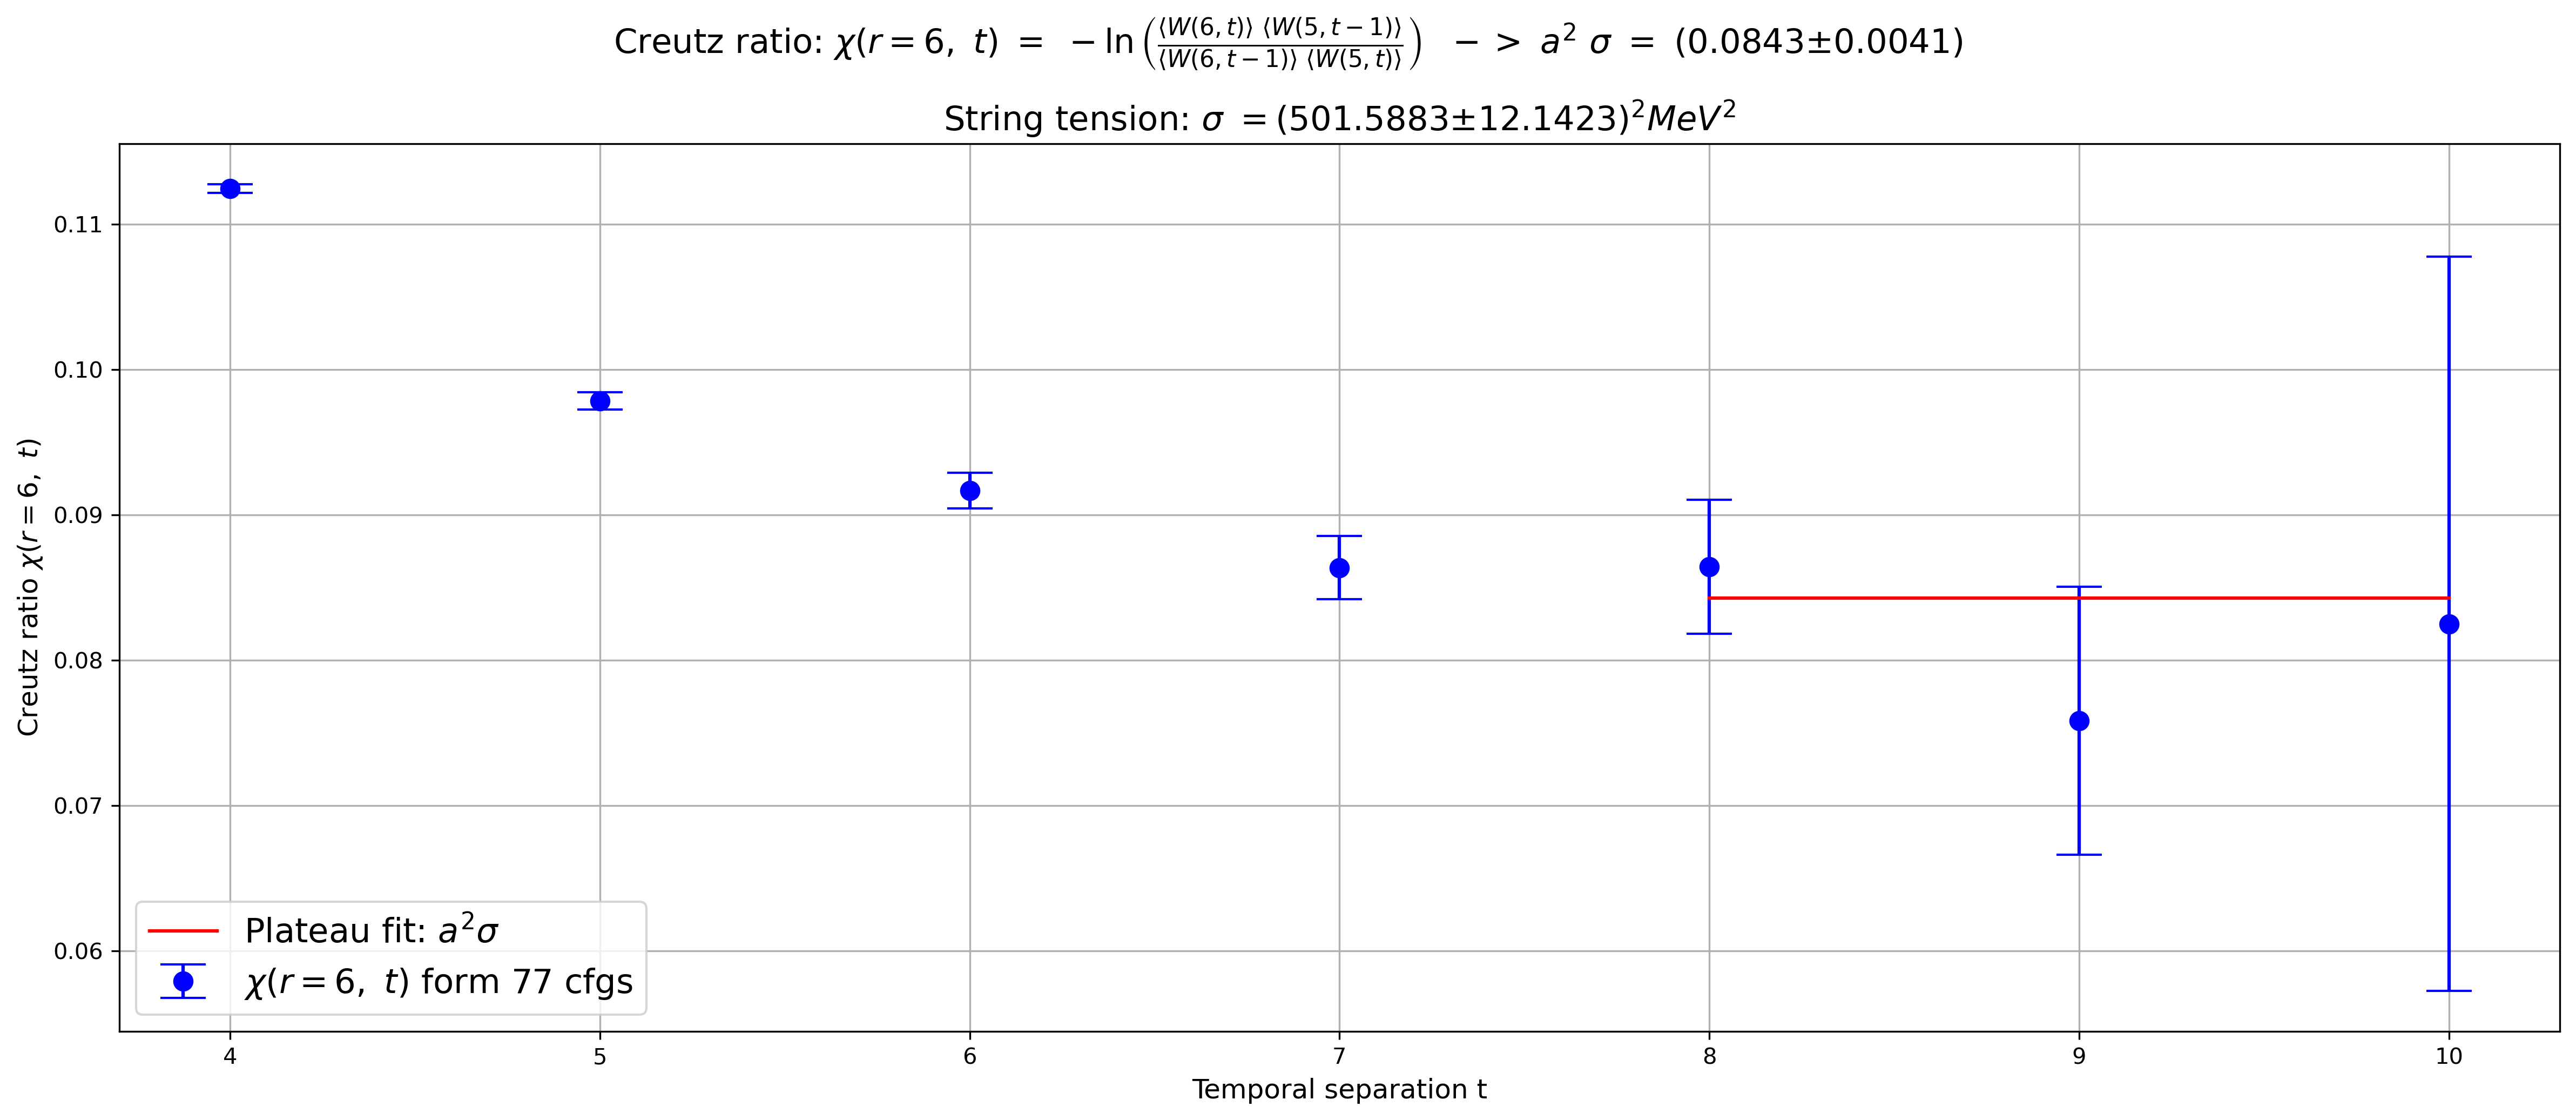

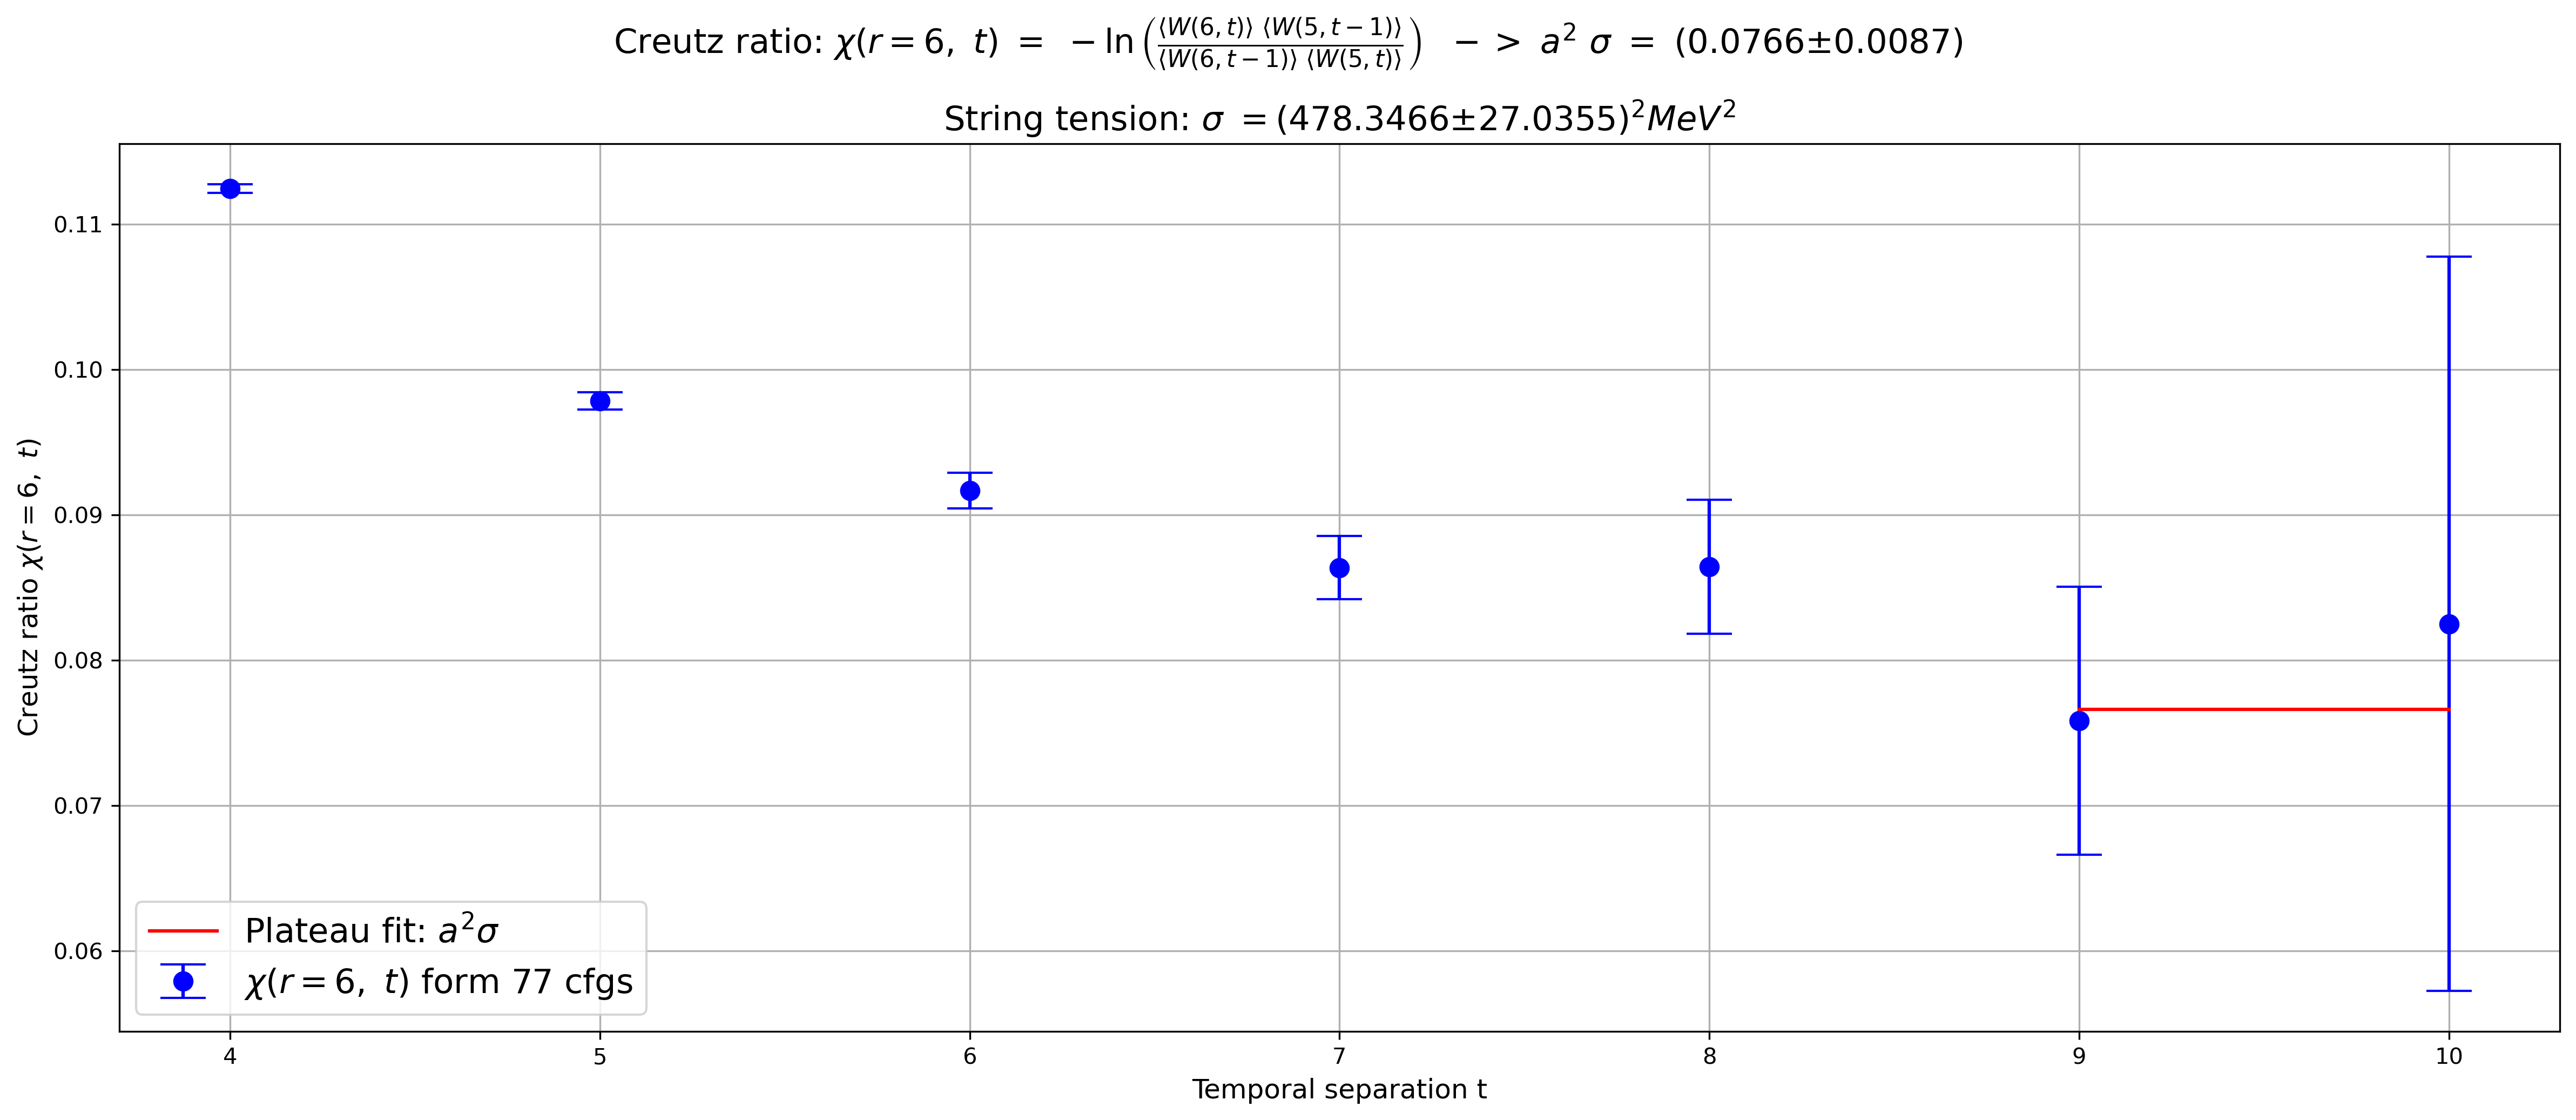

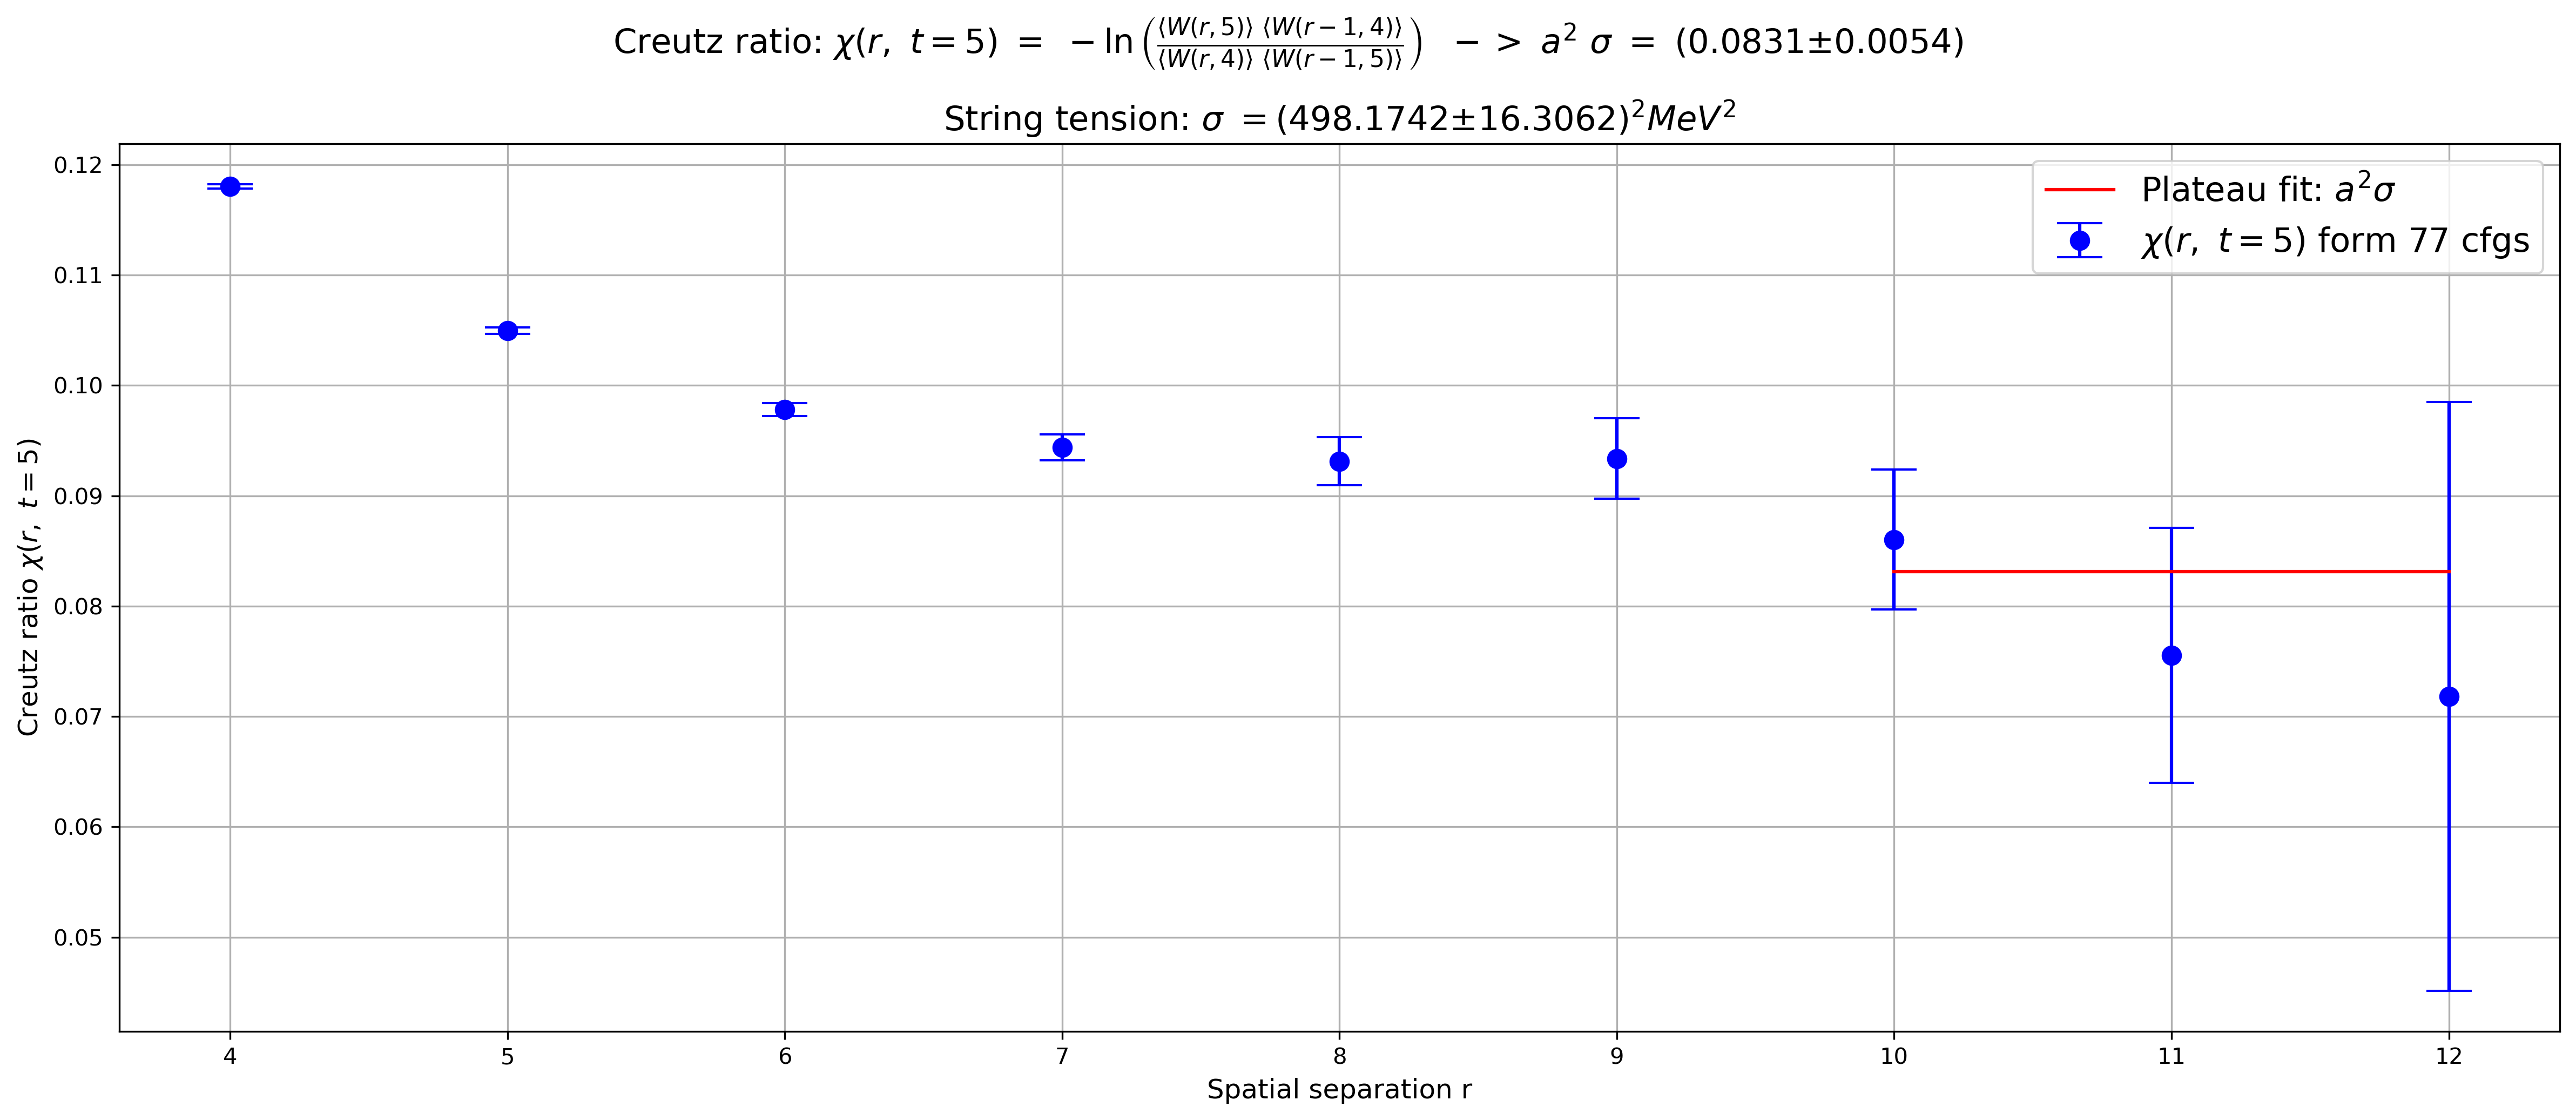

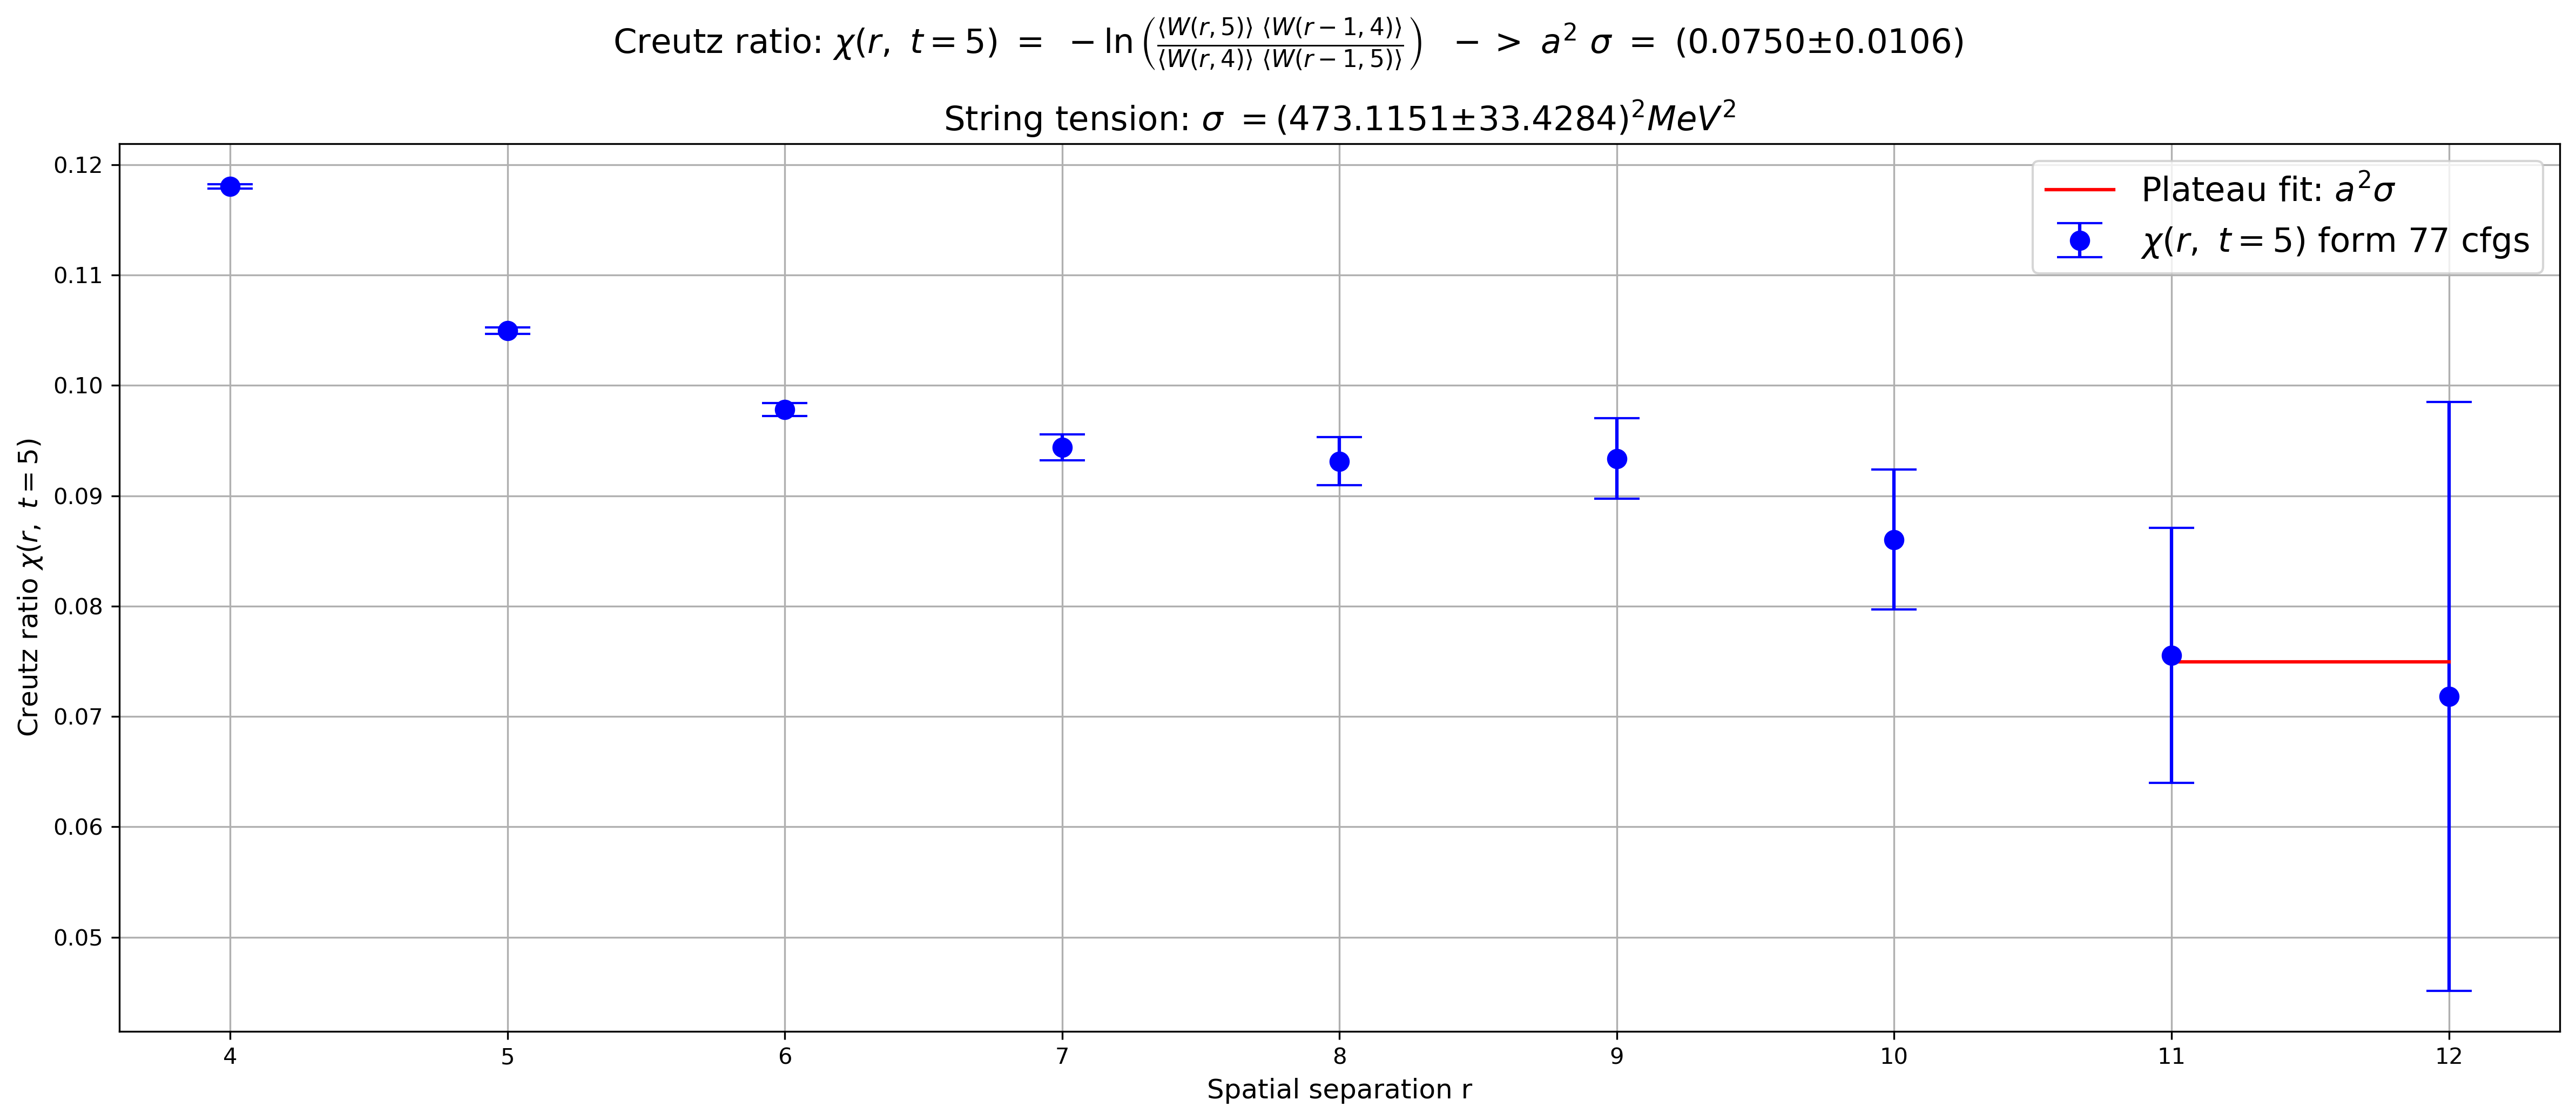

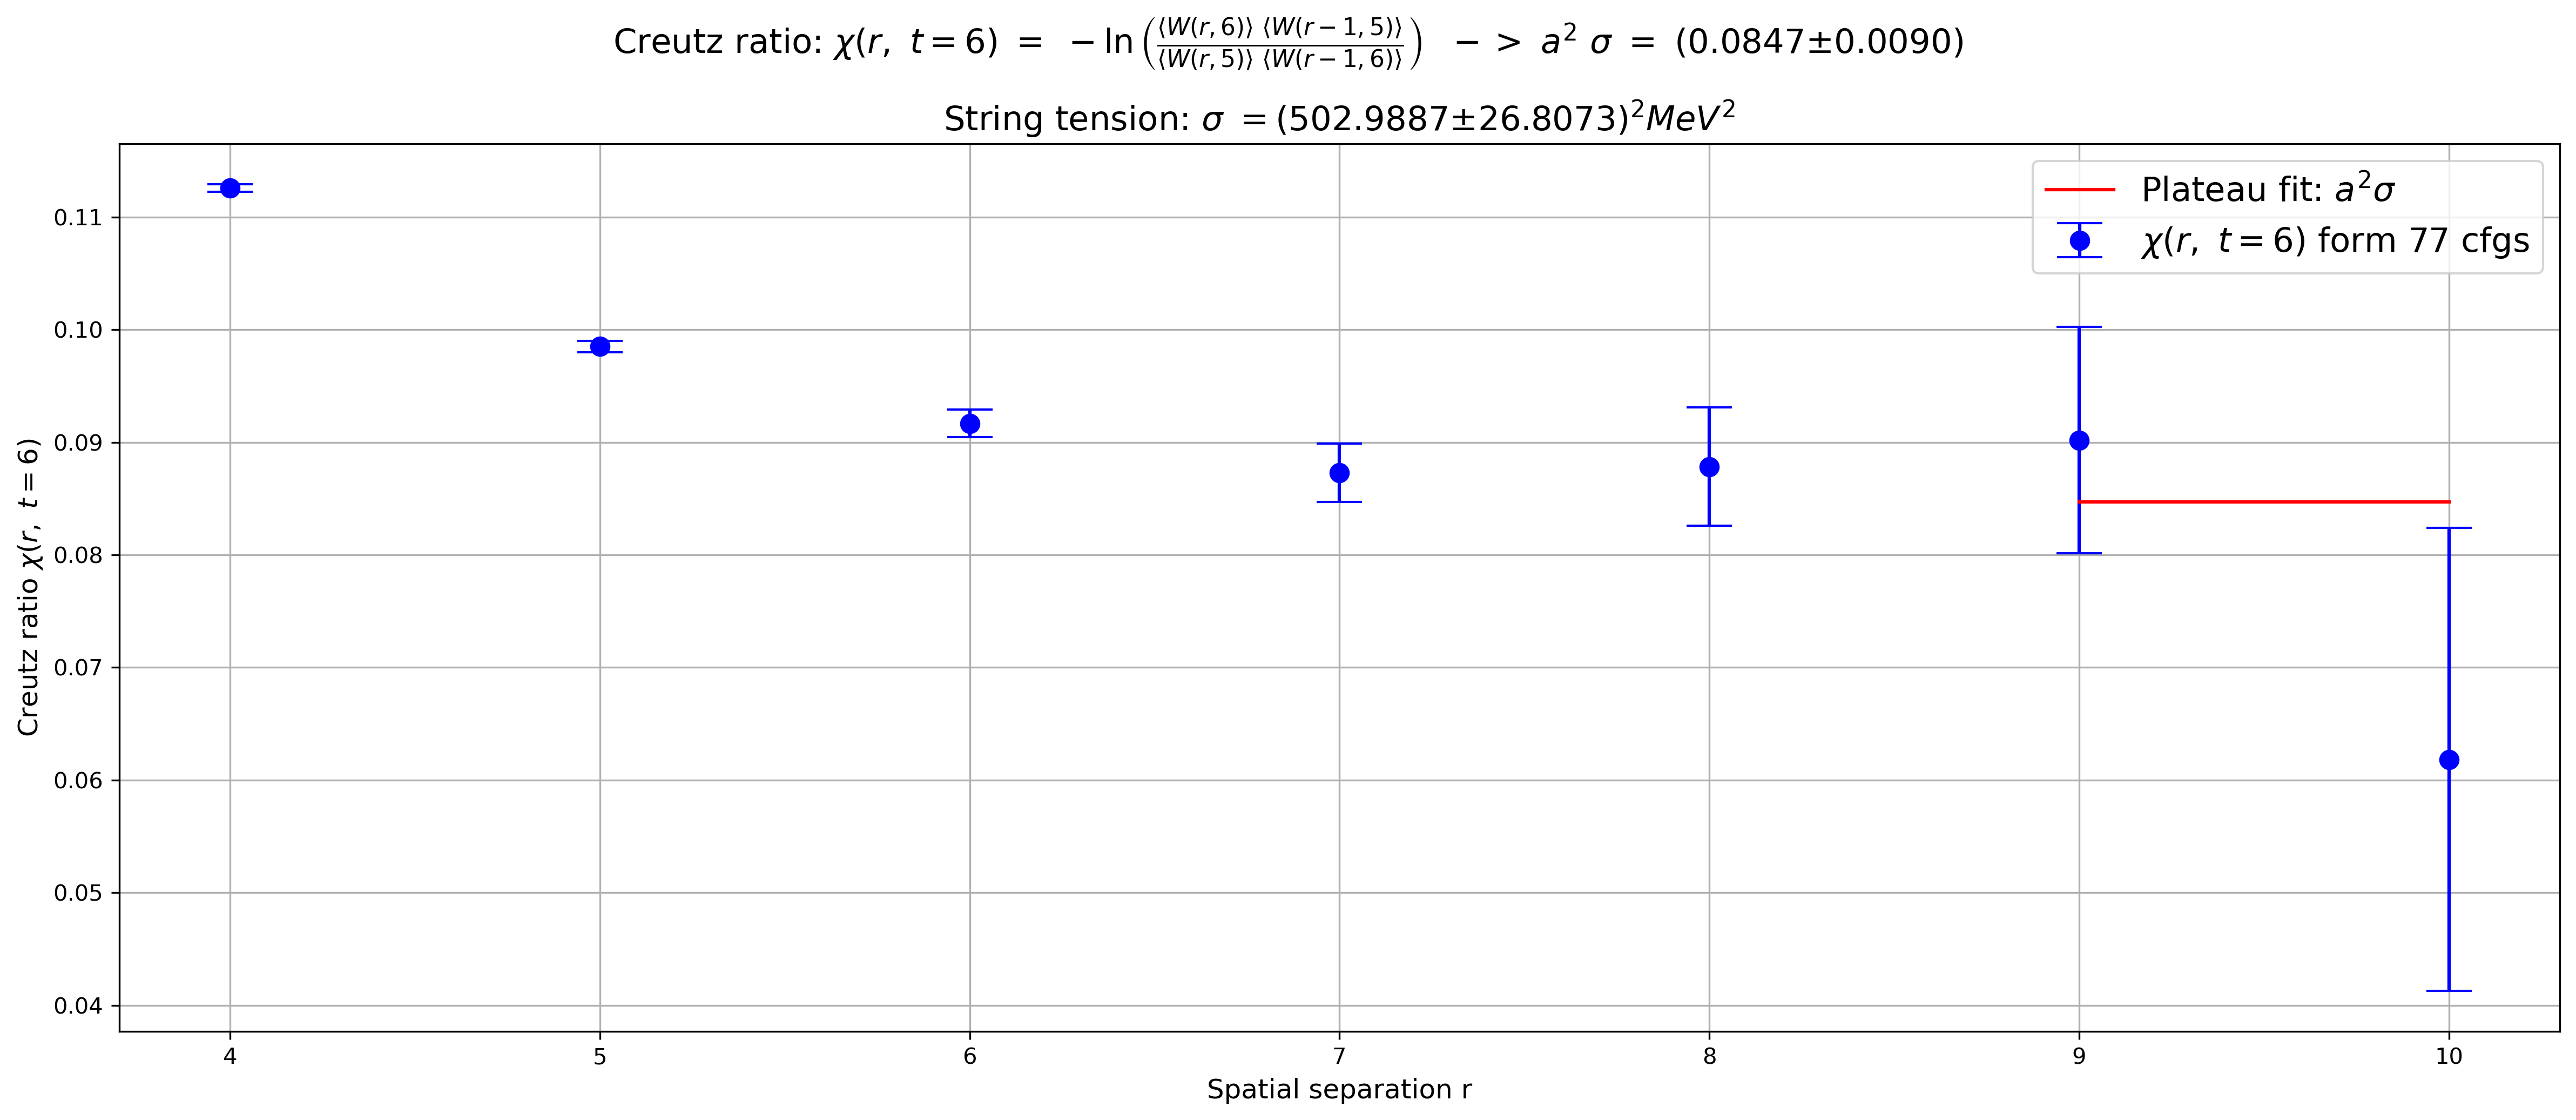

In [16]:
plot_chi_r_6(8, 10, 3)   
plot_chi_r_6(9, 10, 2) 
plot_chi_t_5(10, 12, 3) 
plot_chi_t_5(11, 12, 2) 
plot_chi_t_6(9, 10, 2)   